<a href="https://colab.research.google.com/github/sohyeon98720/doitDeeplearning/blob/master/doitDeeplearning_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 3강 선형회귀
# 데이터셋 불러오기
from sklearn.datasets import load_diabetes
diabetes=load_diabetes()

In [2]:
print (diabetes.data.shape,diabetes.target.shape)

(442, 10) (442,)


In [3]:
print (diabetes.data[0])
print (diabetes.target[0:5])

[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]
[151.  75. 141. 206. 135.]


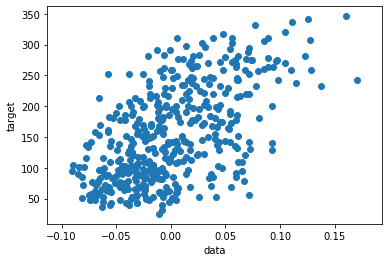

In [4]:
# 그래프를 그려 데이터분포 살펴보기
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:,2],diabetes.target)
plt.xlabel('data')
plt.ylabel('target')
plt.show()

In [0]:
x=diabetes.data[:,2]
y=diabetes.target

In [0]:
# 초기 가중치와 절편 값 설정
w=1.0
b=1.0

In [7]:
y_hat=x[0]*w+b
# 내가 예측한 target 의 값
print (y_hat)

1.0616962065186886


In [8]:
# target 의 값
print(y[0])

151.0


In [9]:
# 실제값과 예측값의 차이
print(y_hat-y[0])

-149.9383037934813


In [10]:
# 가중치 갱신
w_inc=w+0.1
y_hat_inc=x[0]*w_inc+b
print(y_hat_inc)

1.0678658271705574


In [11]:
# 갱신된 가중치로 구한 예측값과 실제값의 차이
print(y_hat_inc-y[0])

-149.93213417282945


In [12]:
#기울기(얼마나 증가했는지 정도)
w_rate=(y_hat_inc-y_hat)/(w_inc-w)
print(w_rate)

0.061696206518688734


In [13]:
#위의 값과 같음을 알 수 있음
print (x[0])

0.0616962065186885


In [14]:
w_new=w+w_rate
print(w_new)

1.0616962065186888


In [15]:
# 절편 갱신
b_inc=b+0.1
y_hat_inc=x[0]*w+b_inc
print(y_hat_inc)

1.1616962065186887


In [16]:
# 절편또한 기울기가 기존 b의 값과 값이 같음을 알 수 있음
b_rate=(y_hat_inc-y_hat)/(b_inc-b)
print(b_rate)

1.0


In [17]:
b_new=b+1
print(b_new)

2.0


In [18]:
# 첫번째샘플가지고 오차구하기 -> 갱신
err=y[0]-y_hat
w_new=w+w_rate*err
b_new=b+1*err
print(w_new,b_new)

10.250624555904514 150.9383037934813


In [19]:
# 두번째샘플가지고 오차구하기 -> 갱신
y_hat=x[1]*w_new+b_new
err=y[1]-y_hat
w_rate=x[1]
w_new=w_new+w_rate*err
b_new=b_new+1*err
print(w_new,b_new)

14.132317616381767 75.52764127612664


In [20]:
# 전체 샘플 반복
for x_i,y_i in zip(x,y):
  y_hat=x_i*w+b
  err=y_i-y_hat
  w_rate=x_i
  w=w+w_rate*err
  b=b+1*err
print(w,b)

587.8654539985689 99.40935564531424


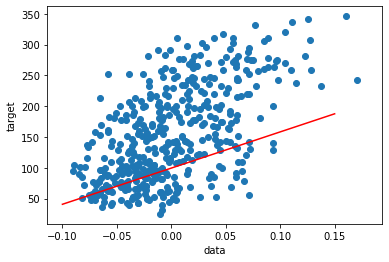

In [21]:
# w,b로 직선의 방정식 그리기
plt.scatter(x,y)
pt1=(-0.1,-0.1*w+b)
pt2=(0.15,0.15*w+b)
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]],'r-')
plt.xlabel('data')
plt.ylabel('target')
plt.show()
# 결과는 꽝 -> 여러 에폭돌리면서 더 나은 직선식 구하기

In [22]:
# 에폭100
for i in range(1,100):
  for x_i,y_i in zip(x,y):
    y_hat=x_i*w+b
    err=y_i-y_hat
    w_rate=x_i
    w=w+w_rate*err
    b=b+1*err
print(w,b)

913.5973364345905 123.39414383177204


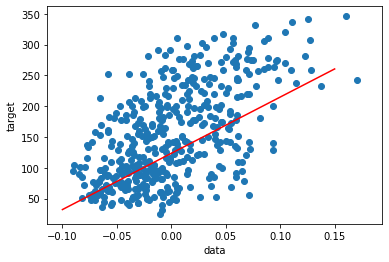

In [23]:
# w,b로 직선의 방정식 그리기
plt.scatter(x,y)
pt1=(-0.1,-0.1*w+b)
pt2=(0.15,0.15*w+b)
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]],'r-')
plt.xlabel('data')
plt.ylabel('target')
plt.show()
# 결과는 굳!

In [24]:
# 위에서 찾은 모델(직선의 방정식)으로 x=0.18일때의 값 예측
x_new=0.18
y_pred=x_new*w+b
print(y_pred)

287.8416643899983


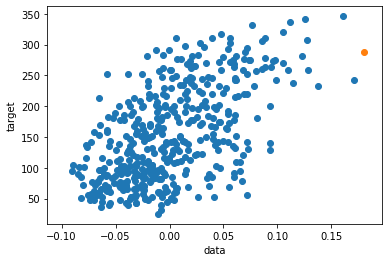

In [25]:
plt.scatter(x,y)
plt.scatter(x_new,y_pred)
plt.xlabel('data')
plt.ylabel('target')
plt.show()

In [0]:
#-------------------------

In [0]:
y_hat=x_i*w+b
err=y_i-y_hat
w_rate=x_i
w=w+w_rate*err

In [0]:
err=y_i-y_hat
b=b+1*err

In [0]:
# 함수화하기
# __init__ : 가중치와 절편값 초기화
def __init__(self):
  self.w=1.0
  self.b=1.0

In [0]:
# forpass : 식에 따른 y예측값을 구함
def forpass(self,x):
  y_hat=x*self.w+self.b
  return y_hat

In [0]:
# backprop : 가중치와 절편을 갱신하기 위함
def backprop(self,x,err):
  w_grad=x*err
  b_grad=1*err
  return w_grad,b_grad

In [0]:
# 위의 함수들을 클래스화 하기

class Nueron:
  def __init__(self):
    self.w=1.0
    self.b=1.0

  def forpass(self,x):
    y_hat=x*self.w+self.b
    return y_hat

  def backprop(self,x,err):
    w_grad=x*err
    b_grad=1*err
    return w_grad,b_grad

  def fit(self,x,y,epochs=100):
    for i in range(epochs):
      for x_i,y_i in zip(x,y):
        y_hat=self.forpass(x_i)
        err=-(y_i-y_hat)
        w_grad,b_grad=self.backprop(x_i,err)
        self.w-=w_grad
        self.b-=b_grad

In [0]:
# 클래스의 객체를 생성하여 함수실행
nueron=Nueron()
nueron.fit(x,y)

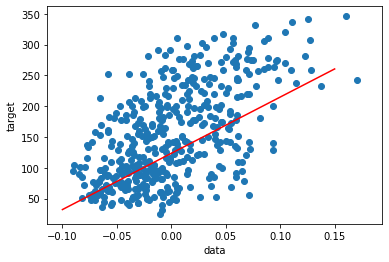

In [34]:
plt.scatter(x,y)
pt1=(-0.1,-0.1*nueron.w+nueron.b)
pt2=(0.15,0.15*nueron.w+nueron.b)
plt.plot([pt1[0],pt2[0]],[pt1[1],pt2[1]],'r-')
plt.xlabel('data')
plt.ylabel('target')
plt.show()